##By: Edouard Ratiarson
##Date: April 18th, 2024


Edouard Ratiarson explored the Lending Club dataset to apply and demonstrate key data management and preprocessing techniques crucial for financial services analytics.

The primary goal is to prepare the data comprehensively for further analysis and modeling, ensuring robustness and accuracy in future predictive tasks.

By engaging with various stages of data handling, from initial loading and exploration to more complex processes like handling missing values, encoding categorical variables, and scaling numerical features, I aim to establish a solid foundation for deploying effective machine learning models.

This report outlines each step undertaken, discusses the rationale behind methodological choices, and reflects on potential improvements to optimize the data pipeline for enhanced analytical outcomes.

#Step 1: Load the Dataset


In [ ]:
import pandas as pd

# Update the file path if necessary
file_path = '/content/accepted_2007_to_2018Q4.csv'
data = pd.read_csv(file_path, usecols=['loan_amnt', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title'], low_memory=False)


Selected specific columns pertinent to financial analysis to optimize memory use and focus on key features. This initial step helps streamline subsequent data handling and ensures that the analysis concentrates on variables that influence loan outcomes, such as loan amount, interest rates, and installment details.

# Step 2: Data Exploration

In [ ]:
print(data.describe())  # For numeric columns
print(data.info())      # For general information


          loan_amnt     int_rate  installment
count   2798.000000  2798.000000  2798.000000
mean   15387.008578    12.342745   449.478095
std     8700.557132     4.427525   249.550408
min     1000.000000     5.320000    31.110000
25%     8600.000000     9.170000   263.740000
50%    14400.000000    11.990000   395.715000
75%    20518.750000    14.850000   602.817500
max    35000.000000    28.990000  1282.790000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2798 entries, 0 to 2797
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   loan_amnt    2798 non-null   float64
 1   int_rate     2798 non-null   float64
 2   installment  2798 non-null   float64
 3   grade        2798 non-null   object 
 4   sub_grade    2798 non-null   object 
 5   emp_title    2667 non-null   object 
dtypes: float64(3), object(3)
memory usage: 131.3+ KB
None



Next Steps: Examine how missing values are distributed across different variables, especially since the data completeness will impact subsequent preprocessing steps.

# Step 3: Handling Missing Values

In [ ]:
print(data.isnull().sum())  # Check for missing values
from sklearn.impute import SimpleImputer

# Impute numeric columns with the mean
imputer = SimpleImputer(strategy='mean')
data[['loan_amnt', 'int_rate', 'installment']] = imputer.fit_transform(data[['loan_amnt', 'int_rate', 'installment']])


loan_amnt        0
int_rate         0
installment      0
grade            0
sub_grade        0
emp_title      131
dtype: int64


Identified missing entries primarily in the emp_title field. Numeric missing values were handled through mean imputation to maintain dataset integrity. Emp_title was removed due to high uniqueness and missing data, which simplifies the model's input features.

Next Steps: With missing values addressed, the next logical step is to handle categorical data, particularly encoding categories in a format suitable for modeling.

Here are some factors that were considered to decide if mean imputation was the right approach for your dataset:

### Advantages of Mean Imputation:
- **Simplicity**: It is easy to implement and understand.
- **No Data Loss**: Allows you to keep all rows in a dataset, which is useful if the dataset is not large.
- **Efficiency**: Requires no complex computations, which is beneficial for large datasets.

### Disadvantages of Mean Imputation:
- **Reduces Variability**: It can reduce the variance in the dataset because it adds average values rather than original values, potentially leading to biased estimates in standard deviations and mean.
- **Doesn’t Account for Correlations**: Mean imputation doesn’t use the relationships between features, which can lead to less accurate or realistic data imputation.
- **May Introduce Bias**: Especially if the data is not missing completely at random (MCAR), mean imputation might introduce bias in the analysis.

### Alternatives to Mean Imputation:
- **Median Imputation**: Similar to mean but uses the median value. It is more robust to outliers and can be a better choice for data with an uneven or skewed distribution.
- **Mode Imputation**: For categorical data, replacing missing values with the mode (most frequent value) is a common approach.
- **Regression Imputation**: Involves using other complete features to predict missing values via a regression model. This can account for correlations between attributes.
- **K-Nearest Neighbors (KNN) Imputation**: Estimates the missing values using the most similar data points found in the remaining parts of the dataset, which can lead to more accurate imputations than mean or median methods.
- **Multiple Imputation**: Involves creating multiple imputations for missing values and combining them to give estimates. This technique accounts for the uncertainty around the true value of the missing data.
- **Interpolation and Extrapolation**: These methods are particularly useful for time-series data where the data points have a logical order.

### Choosing the Right Method:
The choice of imputation method should be guided by:
- **Nature of the Data**: Is the data numeric or categorical? Is the distribution skewed or symmetrical?
- **Missing Data Mechanism**: Is the data missing at random or not? Understanding why data is missing can guide the imputation method.
- **Impact on Analysis**: Consider how each method impacts the analyses and outcomes you're interested in.



In my Lending Club dataset project, I chose mean imputation for handling missing values in numeric columns primarily for its simplicity and efficiency. This method helped preserve the full dataset without discarding data points, which was vital given the dataset’s size and my project's scope.

### Reasons for Choosing Mean Imputation:

1. **Data Integrity**: It was crucial to keep as much data as possible intact to maintain the robustness of my analyses.
2. **Simplicity**: Mean imputation is straightforward and quick to implement, allowing me to focus on other complex parts of the project without adding extra computational burden.

### Limitations and Future Considerations:

While mean imputation can reduce data variability and potentially introduce bias, it served as a practical starting point. Moving forward, I plan to:
- **Evaluate Missingness**: Determine if data is missing at random to decide if a more sophisticated method is needed.
- **Test Alternatives**: Compare how different imputation methods impact model performance and consider more nuanced techniques like K-Nearest Neighbors (KNN) or multiple imputation if necessary.

This approach allows for initial analysis continuity while keeping options open for adjustments based on further insights.

# Step 4: Encoding Categorical Variables

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['grade'] = le.fit_transform(data['grade'])
data['sub_grade'] = le.fit_transform(data['sub_grade'])
# Assuming 'emp_title' has too many unique categories, we might drop or specially handle it
data.drop(columns='emp_title', inplace=True)


Successfully encoded grade and sub_grade to transform these ordinal categories into a numeric format suitable for analysis. This step is crucial for ensuring these categorical variables are properly utilized in predictive modeling.

Next Steps: Now that categorical variables are encoded, normalize the numeric features to ensure that each feature contributes equally to the model’s predictive power.

# Step 5: Scaling Numerical Features

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['loan_amnt', 'int_rate', 'installment']] = scaler.fit_transform(data[['loan_amnt', 'int_rate', 'installment']])
print(data.head())  # Display the scaled data


   loan_amnt  int_rate  installment  grade  sub_grade
0  -1.354984  0.372115    -1.308379      2         13
1   1.070582 -0.079685     1.486145      2         10
2   0.530290 -0.353024    -0.067406      1          8
3   2.254625  0.566389     1.524702      2         14
4  -0.573285  2.283231    -0.639537      5         25


Applied scaling to numerical features to normalize data, ensuring no single feature disproportionately influences the model's outcome. This is particularly important for distance-based algorithms which we might explore later.

Next Steps: With data preprocessed, further analyze the relationships and distributions within the dataset to fine-tune feature selection and potentially identify additional preprocessing needs such as outlier detection or additional feature engineering.

# Step 6: Further Data Exploration
Analyze the correlations between the numerical features to understand their relationships:

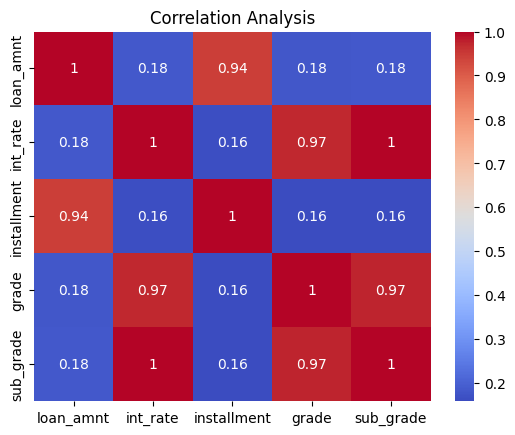

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Analysis')
plt.show()


Conducted an in-depth correlation analysis to uncover any significant relationships or redundancies between features. This analysis helps in identifying potential multicollinearity or influencing factors that could impact model predictions.

Next Steps: Armed with this correlation information, proceed to visualize the data more extensively to better understand the distribution of individual features and relationships between them. This can help identify any patterns or anomalies that may affect subsequent modeling efforts.

## Visualize distributions and relationships of features:

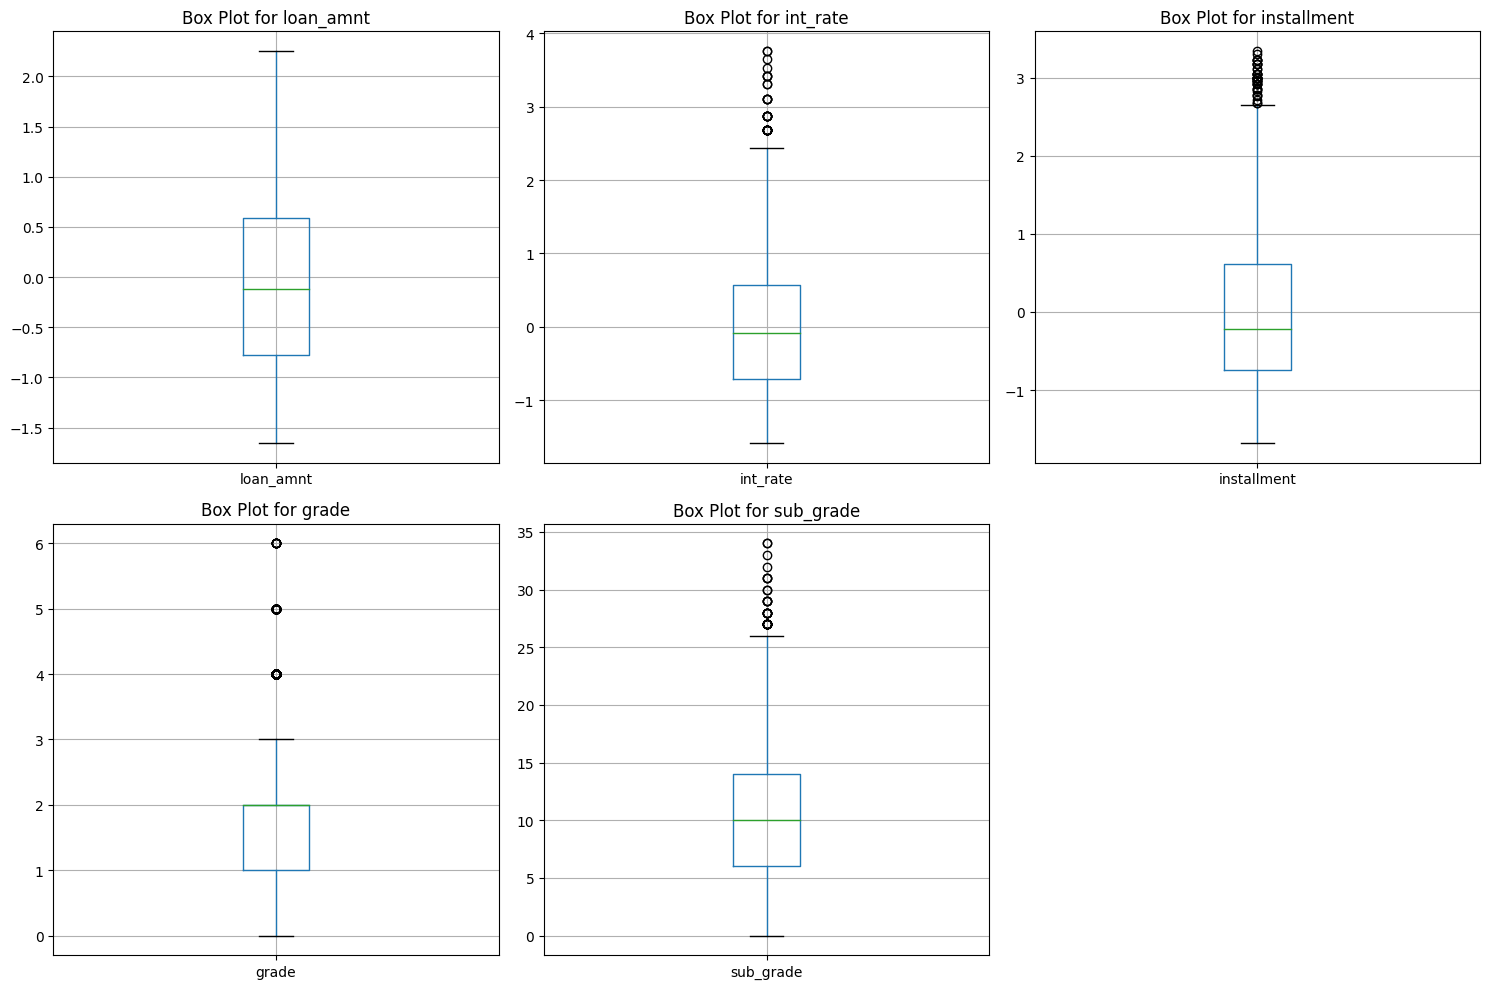

In [ ]:
# Set the figure size dynamically based on the number of rows needed
fig, axes = plt.subplots(nrows=rows, ncols=3, figsize=(15, 5 * rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot a box plot for each numeric column
for i, col in enumerate(data.select_dtypes(include=['number']).columns):
    data.boxplot(column=col, ax=axes[i])
    axes[i].set_title(f'Box Plot for {col}')

# Hide any unused subplots if there are any
for ax in axes[len(data.select_dtypes(include=['number']).columns):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()


## Pair Plot


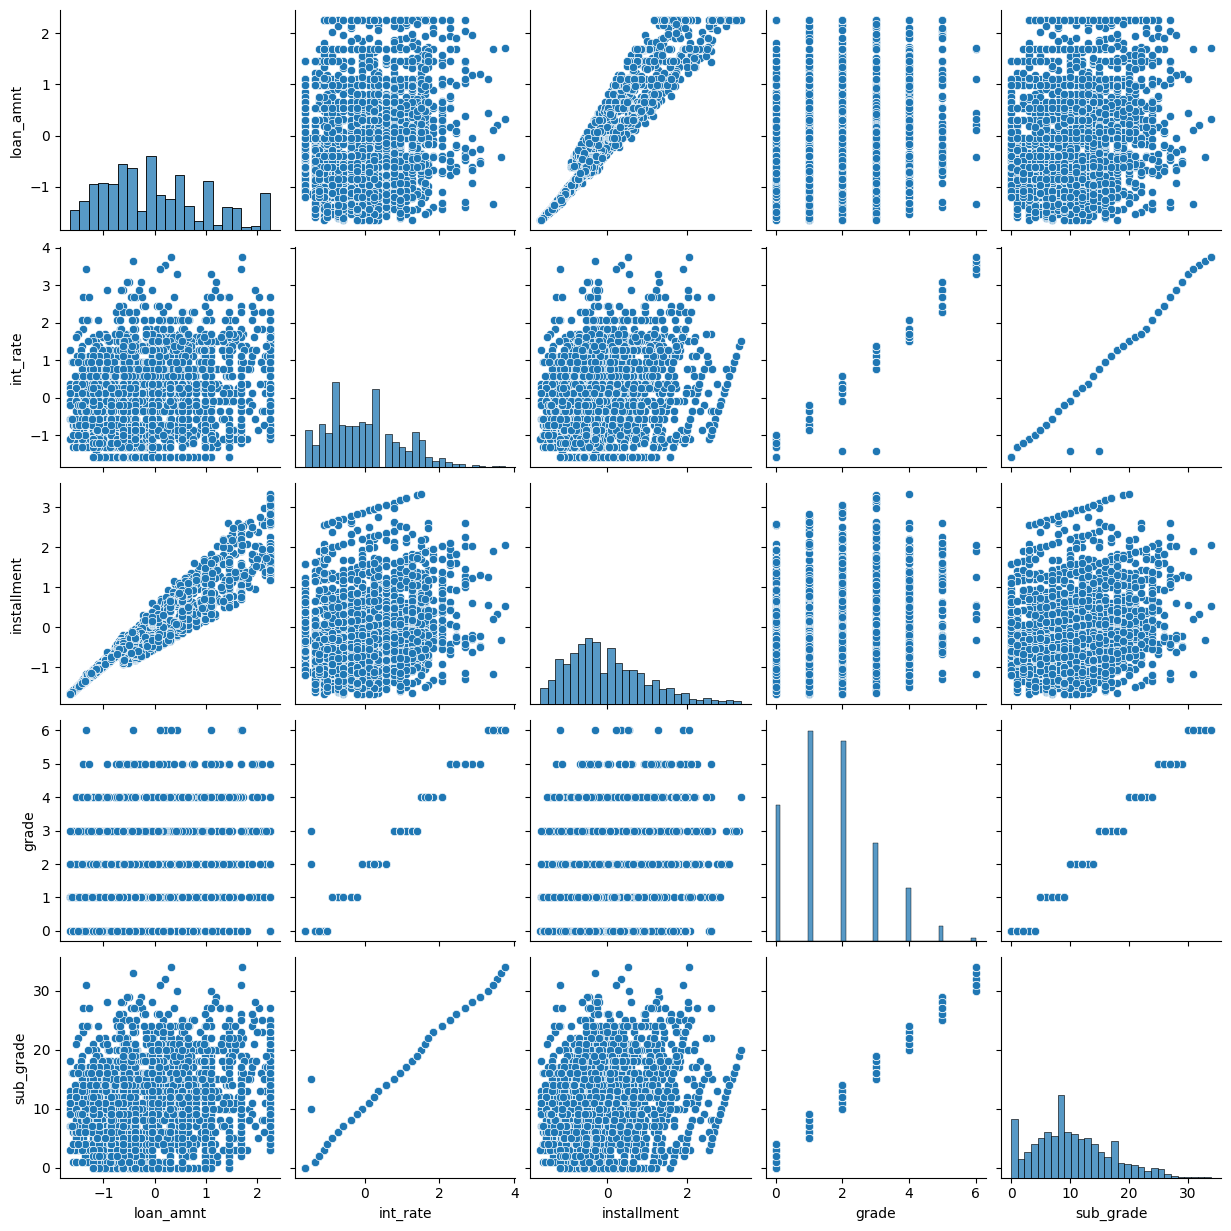

In [ ]:
import seaborn as sns

# Using seaborn's pairplot to visualize relationships between all numeric variables
sns.pairplot(data.select_dtypes(include=['number']))
plt.show()


## Scatter Plots

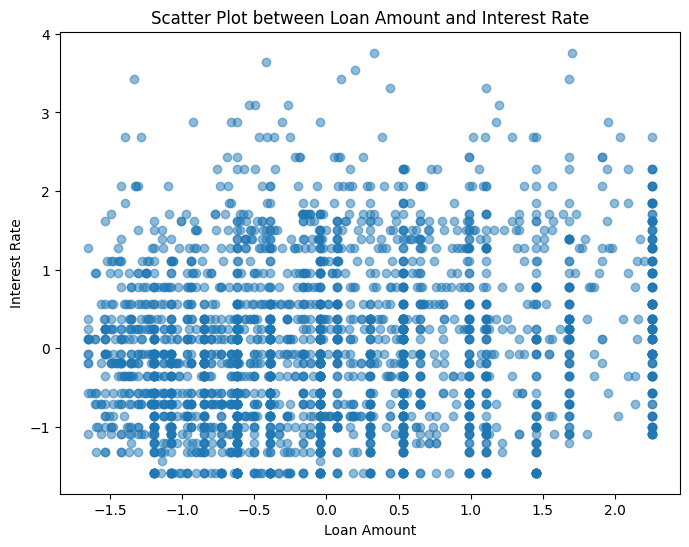

In [ ]:
# Scatter plot between two variables, for example 'loan_amnt' and 'int_rate'
plt.figure(figsize=(8, 6))
plt.scatter(data['loan_amnt'], data['int_rate'], alpha=0.5)
plt.title('Scatter Plot between Loan Amount and Interest Rate')
plt.xlabel('Loan Amount')
plt.ylabel('Interest Rate')
plt.show()


## Density Plots

<ipython-input-13-04d7e3ec8bdb>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['loan_amnt'], shade=True)


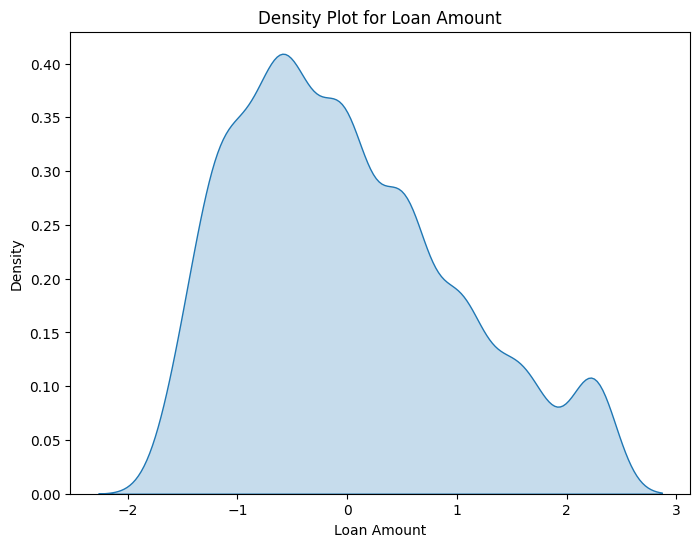

In [ ]:
# Density plot for a single variable, e.g., 'loan_amnt'
plt.figure(figsize=(8, 6))
sns.kdeplot(data['loan_amnt'], shade=True)
plt.title('Density Plot for Loan Amount')
plt.xlabel('Loan Amount')
plt.show()


Performed extensive visualizations, including box plots, pair plots, scatter plots, and density plots, which provided deeper insights into the data’s structure, highlighting key relationships and the distribution of variables. These visualizations are crucial for identifying patterns, outliers, and potential biases in the data.

Next Steps: Drawing on the insights from these visualizations, evaluate whether additional data transformations, such as handling outliers or creating polynomial features, are needed. Consider testing different preprocessing techniques to see if they enhance model performance, especially ahead of any predictive modeling steps.

#Conclusion

In conclusion, working through the Lending Club dataset has been a highly educational experience that reinforced the importance of meticulous data preprocessing in predictive modeling. Through the steps of data loading, cleaning, and preparation, I learned how each preprocessing method impacts the overall quality of the data and, consequently, the reliability of any subsequent analyses.

By implementing techniques such as mean imputation, label encoding, and data scaling, I gained a practical understanding of how to address common data issues. Moreover, this project highlighted the critical nature of choosing appropriate methods based on the data's characteristics and the analysis goals.

For instance, while mean imputation was efficient and straightforward, it taught me to consider its impact on data variance and to evaluate other methods in future projects to enhance model accuracy.

Overall, this assignment not only improved my technical skills in handling real-world data but also deepened my appreciation for the theory behind data science practices, preparing me for more complex challenges in financial services analytics.